# Earthquake Data Analysis

### Description

The catalog includes the magnitude, time of occurrence (s), and 3D coordinates (m) of earthquakes in about 20 years of recording in South California. Coordinates were converted from latitude, longitude, and depth of events in a seismic catalog. Magnitudes should be within the range $[0,8]$.

* **Waiting time (t)**: time interval between an event and the next one in the sequence.
* **Distance (r)**: Eucledian 3D distance between events. (each 3D set of coordinates refers to the hypocenter, i.e. the point triggering the slip in a fault that forms the earthquake)

In [1]:
#useful to make group based on the pointer
#df['event'] = df['pointer'].where(df['pointer'] != -1, df['index'])

### Assignments

3. Compute the distribution $P_m(t)$ of waiting times for events of magnitude m or above (i.e. do not consider events below $m$). In shaping the bin sizes, take into account that this distribution is expected to have a power-law decay with time (e.g $\sim 1/t$), and that a power-law is well visualized in log-log scale. Do this analysis for many values of $m$, say $m=2,3,4,5$.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator as mpl
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider
from pyproj import Proj, transform
import seaborn as sns

%matplotlib inline
#%precision 4

In [79]:
#load the file
file_name = r"C:\Users\utente\AppData\Local\Packages\CanonicalGroupLimited.Ubuntu18.04onWindows_79rhkp1fndgsc\LocalState\rootfs\home\beppe\Earthquake-Data-Analysis\SouthCalifornia-1982-2011_Physics-of-Data.dat"
df = pd.read_csv(file_name, sep='\s', usecols=[i for i in range(0,7,1)], 
                 names=['index','pointer','t','mag','lat','long','dep'], engine='python')

#convert the seconds in standard form time
#df['t'] = pd.to_datetime(df['t'], unit='s').astype('datetime64[ms]')
df.sort_values(by='t')

,index,pointer,t,mag,lat,long,dep
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546
...,...,...,...,...,...,...,...
110266,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743
110267,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285
110268,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121
110269,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903


In [47]:
#function tu compute the distance r between two events (not useful for me)
def dist(one, datafr):
    coord = ['lat', 'long', 'dep']
    return round(np.sqrt(np.array([(datafr[c][one+1] - datafr[c][one])**2 for c in coord]).sum()), 4)

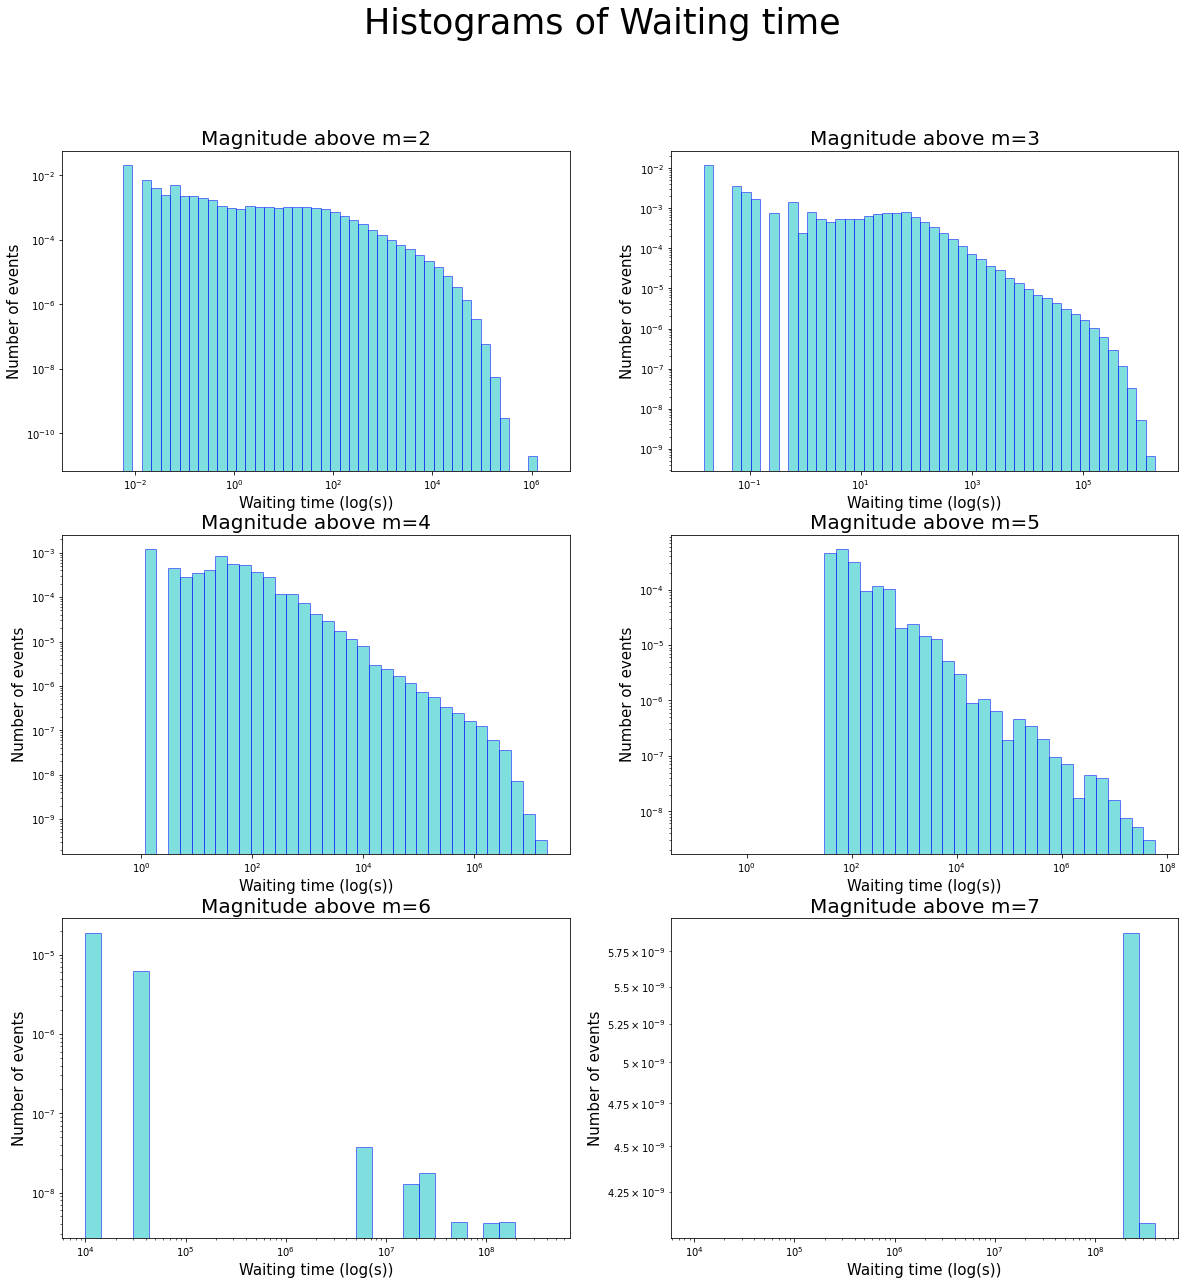

In [85]:
#Distribution of waiting times for magnitude m or above

fig, ((ax1, ax2),(bx1, bx2),(cx1, cx2)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.suptitle('Histograms of Waiting time', fontsize=35)

#lists for histograms
bin_list = [np.logspace(np.log10(10**(-3)), np.log10(2*10**6), 50), np.logspace(np.log10(10**(-2)),np.log10(2*10**6), 50),
            np.logspace(np.log10(10**(-1)), np.log10(2*10**7), 40), np.logspace(np.log10(0.1),np.log10(6*10**7), 40),
            np.logspace(np.log10(10**4), np.log10(4*10**8), 30), np.logspace(np.log10(10**4), np.log10(4*10**8), 30)]
m_list = [i for i in range(2,8,1)]
plot_list = [ax1, ax2, bx1, bx2, cx1, cx2]

for b,m,p in zip(bin_list, m_list, plot_list):
    
    #select events with m or above magnitude
    mask = df['mag'] >= m
    dt = df['t'][mask].diff().dropna(how='any')
    
    #histogram of waiting time
    p.hist(dt, bins = b, alpha = 0.5, color = 'c', edgecolor='b', 
             label = 'data', density=True)
    p.set_xscale('log')
    p.set_yscale('log')
    p.set_title('Magnitude above m=' + str(m), fontsize=20)
    p.set_xlabel('Waiting time (log(s))', fontsize=15)
    p.set_ylabel('Number of events', fontsize=15)


#plt.grid(True, linestyle="--", linewidth=0.5, color='.25')

Text(0, 0.5, 'Number of events')

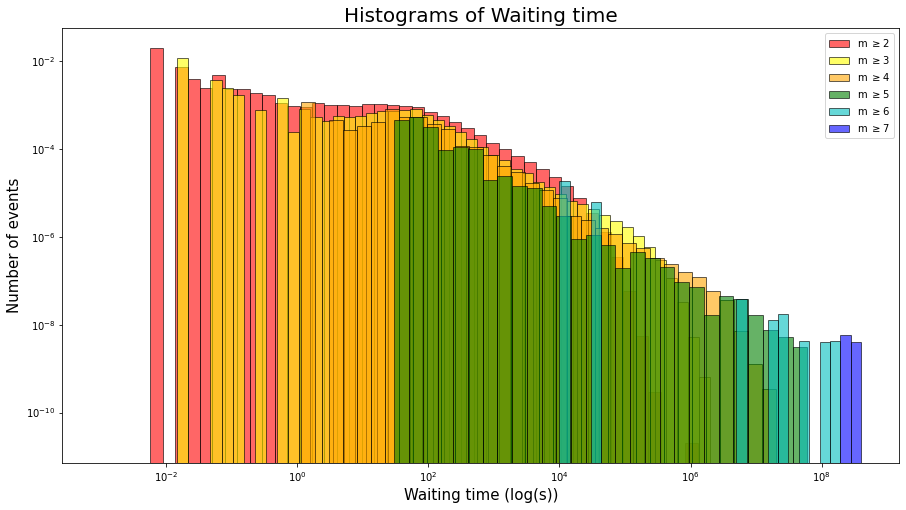

In [156]:
fig, p = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

#lists for histograms
bin_list = [np.logspace(np.log10(10**(-3)), np.log10(2*10**6), 50), np.logspace(np.log10(10**(-2)),np.log10(2*10**6), 50),
            np.logspace(np.log10(10**(-1)), np.log10(2*10**7), 40), np.logspace(np.log10(0.1),np.log10(6*10**7), 40),
            np.logspace(np.log10(10**4), np.log10(4*10**8), 30), np.logspace(np.log10(10**4), np.log10(4*10**8), 30)]
m_list = [i for i in range(2,8,1)]
color_list = ['r', 'yellow', 'orange', 'green', 'c', 'b']

for b,m,c in zip(bin_list, m_list, color_list):
    
    #select events with m or above magnitude
    mask = df['mag'] >= m
    dt = df['t'][mask].diff().dropna(how='any')
    
    #histogram of waiting time
    p.hist(dt, bins = b, alpha = 0.6, color = c, edgecolor='black', label = 'm $\geq$' + str(m), density=True)
    
p.legend()
p.set_xscale('log')
p.set_yscale('log')
p.set_title('Histograms of Waiting time', fontsize=20)
p.set_xlabel('Waiting time (log(s))', fontsize=15)
p.set_ylabel('Number of events', fontsize=15)

Text(0, 0.5, 'Number of events')

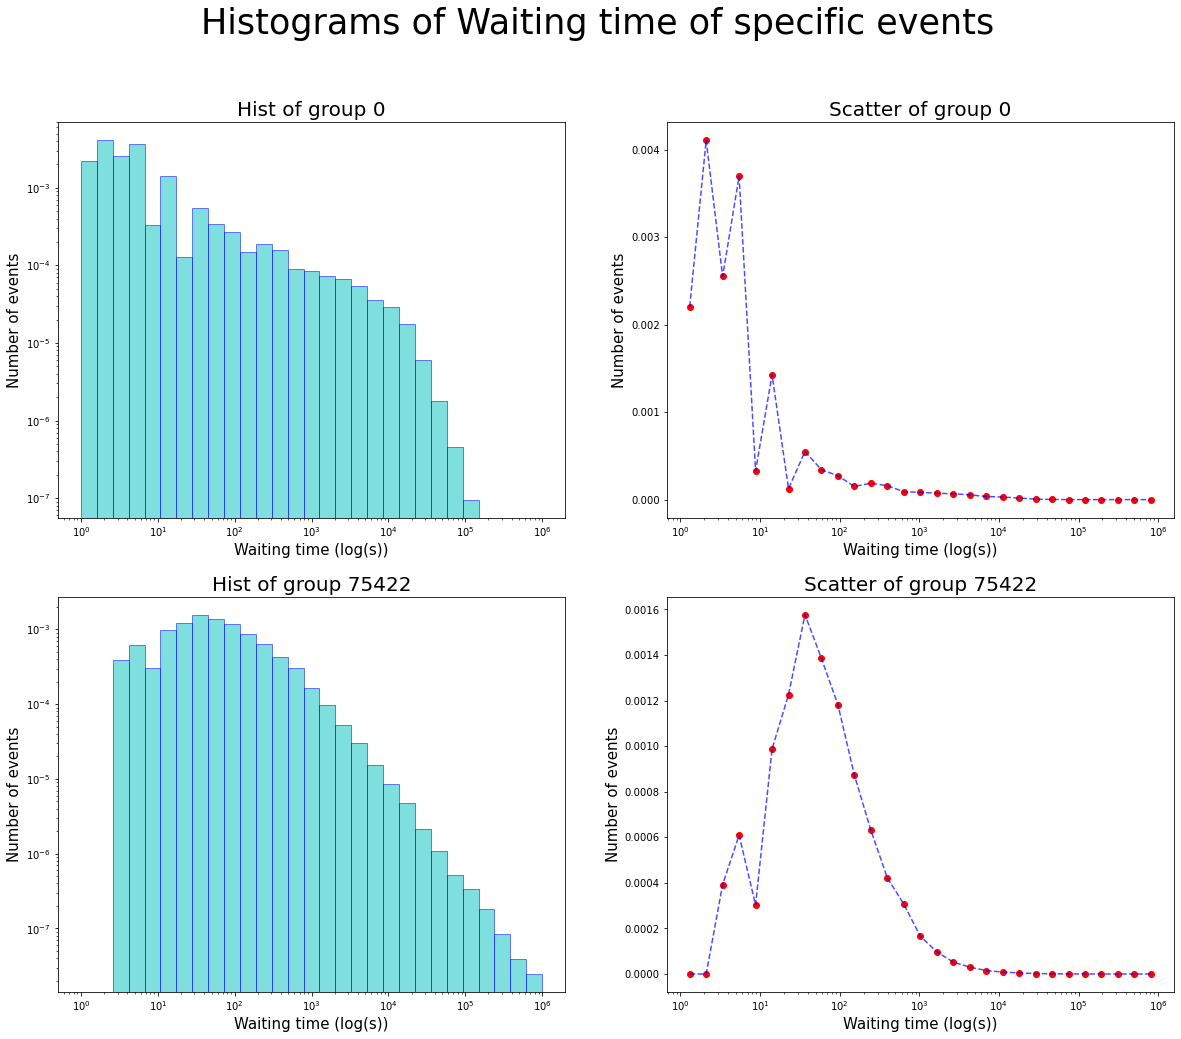

In [166]:
#Histograms of some groups of concatenated events

fig, ((ax1, ax2),(bx1, bx2)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
fig.suptitle('Histograms of Waiting time of specific events', fontsize=35)

#creating an event column to connect events with same pointer
df['event'] = df['pointer'].where(df['pointer'] != -1, df['index'])
df_g = df[df['event'] == df['event'][0]]

m = 2
mask = df_g['mag'] >= m
dt = df_g['t'][mask].diff().dropna(how='any')

#histograms of waiting time  
n, bins, patches = ax1.hist(dt, bins=np.logspace(np.log10(1), np.log10(10**6), 30), alpha = 0.5, color = 'c', edgecolor='b', label = 'data', density=True)
ax1.set_title('Hist of group 0', fontsize=20)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Waiting time (log(s))', fontsize=15)
ax1.set_ylabel('Number of events', fontsize=15)

bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
ax2.scatter(bins_mean, n, color='r')
ax2.plot(bins_mean, n, color='b', linestyle='--', alpha=0.7)
ax2.set_title('Scatter of group 0', fontsize=20)
ax2.set_xscale('log')
ax2.set_xlabel('Waiting time (log(s))', fontsize=15)
ax2.set_ylabel('Number of events', fontsize=15)

#creating an event column to connect events with same pointer
df['event'] = df['pointer'].where(df['pointer'] != -1, df['index'])
df_g = df[df['event'] == 75422]

m = 2
mask = df_g['mag'] >= m
dt = df_g['t'][mask].diff().dropna(how='any')

#histograms of waiting time  
n, bins, patches = bx1.hist(dt, bins=np.logspace(np.log10(1), np.log10(10**6), 30), alpha = 0.5, color = 'c', edgecolor='b', label = 'data', density=True)
bx1.set_title('Hist of group 75422', fontsize=20)
bx1.set_xscale('log')
bx1.set_yscale('log')
bx1.set_xlabel('Waiting time (log(s))', fontsize=15)
bx1.set_ylabel('Number of events', fontsize=15)

bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
bx2.scatter(bins_mean, n, color='r')
bx2.plot(bins_mean, n, color='b', linestyle='--', alpha=0.7)
bx2.set_title('Scatter of group 75422', fontsize=20)
bx2.set_xscale('log')
bx2.set_xlabel('Waiting time (log(s))', fontsize=15)
bx2.set_ylabel('Number of events', fontsize=15)

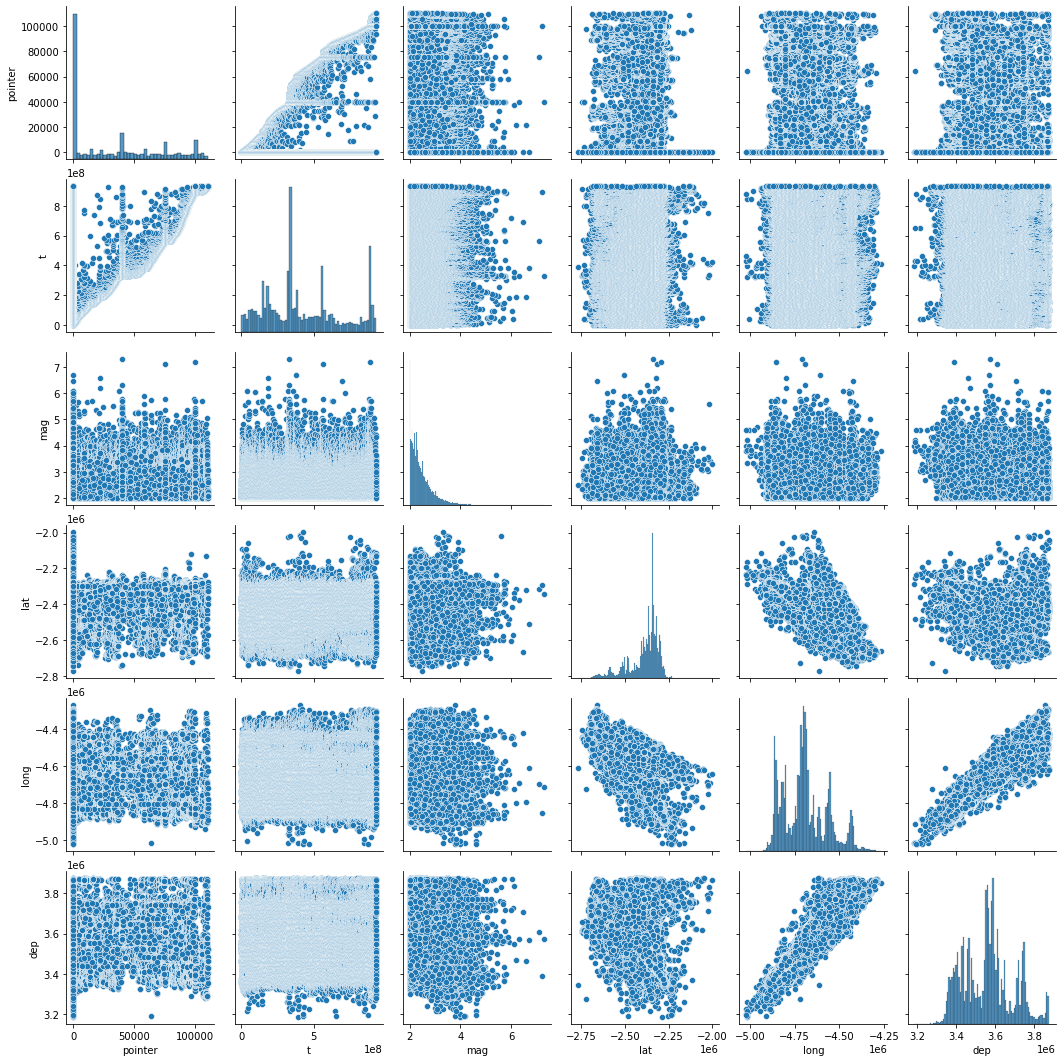

In [6]:
sns.pairplot(df)